In [3]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("./data/gemstone.csv")

In [4]:
data.drop(labels=["id"],axis=1,inplace=True)

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
X=data.drop(labels=["price"],axis=1)
y=data[["price"]]

In [8]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [9]:
y.head()

,price
0,13619
1,13387
2,2772
3,666
4,14453


In [10]:
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns

In [11]:
categorical_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [12]:
numerical_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [13]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [14]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [15]:
num_pipeline=Pipeline(
    
    
    steps=[
        
        ('imputer',SimpleImputer()),
        ('scaler', StandardScaler())
    ]
    
    
)

In [16]:
cat_pipeline=Pipeline(
    
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
    
)

In [17]:
preprocessor=ColumnTransformer(
    [
        
        ('num_pipeline',num_pipeline,numerical_cols),
        ('cat_pipeline',cat_pipeline,categorical_cols)
    ]
)

In [18]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [19]:
preprocessor.fit_transform(X_train)

array([[-0.97543926, -0.84960654, -0.12153081, ...,  4.        ,
         5.        ,  5.        ],
       [ 0.2351953 ,  1.83363716, -0.12153081, ...,  1.        ,
         1.        ,  2.        ],
       [ 0.49461699,  0.81585507,  0.39980029, ...,  3.        ,
         3.        ,  4.        ],
       ...,
       [ 0.45138004,  1.55606023, -0.6428619 , ...,  1.        ,
         3.        ,  2.        ],
       [ 0.66756478, -1.77486298,  1.44246248, ...,  4.        ,
         3.        ,  4.        ],
       [ 0.25681377,  0.81585507, -0.12153081, ...,  4.        ,
         3.        ,  2.        ]])

In [20]:
preprocessor.transform(X_test)

array([[-0.56468825, -0.94213218, -0.6428619 , ...,  3.        ,
         1.        ,  3.        ],
       [-0.17555571,  1.00090636, -0.12153081, ...,  2.        ,
         4.        ,  2.        ],
       [-1.06191316,  0.2607012 , -0.12153081, ...,  4.        ,
         4.        ,  7.        ],
       ...,
       [-0.19717419, -3.34779894,  1.44246248, ...,  3.        ,
         6.        ,  3.        ],
       [-0.82410994, -0.20192702, -0.12153081, ...,  4.        ,
         3.        ,  2.        ],
       [ 2.61322747, -0.75708089,  1.44246248, ...,  3.        ,
         6.        ,  3.        ]])

In [21]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [22]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [23]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,4.0,5.0,5.0
1,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,1.0,1.0,2.0
2,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,3.0,3.0,4.0
3,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,3.0,3.0,3.0
4,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,4.0,6.0,5.0


In [24]:
X_test.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.564688,-0.942132,-0.642862,-0.429765,-0.464061,-0.500036,3.0,1.0,3.0
1,-0.175556,1.000906,-0.121531,-0.042137,-0.028595,0.036132,2.0,4.0,2.0
2,-1.061913,0.260701,-0.121531,-1.304180,-1.298703,-1.268060,4.0,4.0,7.0
3,0.970223,-0.201927,1.963794,1.048629,0.996563,0.978049,3.0,3.0,3.0
4,-0.932202,-1.312235,0.399800,-1.006699,-0.990248,-1.065186,3.0,1.0,4.0


In [25]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [26]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}

In [28]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [29]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [30]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()


In [31]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet'])

In [32]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), ElasticNet()])

In [33]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    #this is a validation(test) score
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 1013.9047094344004
MAE: 674.0255115796833
R2 score 93.68908248567512


Lasso
Model Training Performance
RMSE: 1013.8723151049944
MAE: 675.2036880701619
R2 score 93.68948574778251


Ridge
Model Training Performance
RMSE: 1013.9058997761061
MAE: 674.056513229593
R2 score 93.68906766741328


Elasticnet
Model Training Performance
RMSE: 1513.9140350229763
MAE: 1050.7468664314322
R2 score 85.92978759337907




In [35]:
r2_list

[0.9368908248567511,
 0.9368948574778251,
 0.9368906766741328,
 0.8592978759337908]

In [37]:
model_list

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [39]:
import matplotlib.pyplot  as plt

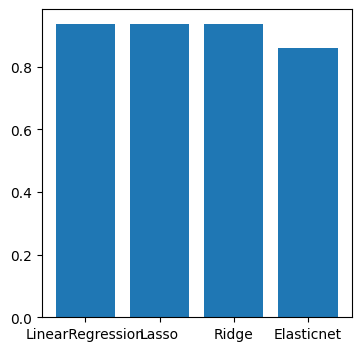

In [45]:
plt.figure(figsize=(4,4))
plt.bar(model_list,r2_list,align="center")
plt.show()